En este cuaderno se implementan algunas funciones y algunos segmentos de código que pueden ser útiles para el desarrollo del Taller 1 del curso.

Comienzo importando dos librerías que no habíamos usado hasta ahora en el curso.

La librería os nos permite interactuar con algunas funcionalidades del sistema operativo. La vamos a utilizar para construir rutas a archivos que sean independientes del sistema operativo utilizado.

La librería pandas es muy utilizada para análisis de datos. En primera instancia implementa una estructura de datos llamada 'dataframe' similar a una hoja de calculo. Adicionalmente, implementa numerosas funciones para realizar calculos estadísticos sobre estas estructuras.


In [1]:
import os
import pandas as pd

Tradicional comando para facilitar el cálculo interactivo.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


En la siguiente celda muestro cómo podemos leer los datos desde archivos .csv a pandas dataframes.

Acá se puede apreciar el uso de os.path.join para la creación de las rutas de los archivos.

Noten la configuración de la función pd.read_csv. El parámetro sep=';' determina que las variables están separadas por punto y coma y no por coma. El encoding='latin-1' permite leer correctamente caracteres como la 'ñ'.

In [3]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')


En la siguiente celda, implemento dos funciones útiles para realizar algunos de los cálculo necesarios para el cálculo de la ENFICC como está determinado en la Resolución CREG 071 de 2006.

La función ghi_mensual calcula la energía total en $kWh/m^2$ para cada mes en la serie de datos. Con esta información, la función ghi_dia calcula el promedio diario de cada mes.

In [4]:
def ghi_mensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes))
                                         ,"DIAS"].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual["AÑO"] == agno)
                            & (serie_ghi_mensual["MES"] == mes)),
                "GHImes"].item()/dias
            ghi_dict = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df


En la siguiente celda se utilizan las dos funciones definidas previamente y se organizan los valores promedio mensuales.

In [5]:
ghi_mensual_loc = ghi_mensual(serie_pd)
ghi_diario_loc = ghi_dia(ghi_mensual_loc)
datos_IDEAM = sorted(ghi_diario_loc["GHIdiario"])

A continuación hago una sencilla gráfica de la distribución de energía promedio mensual.

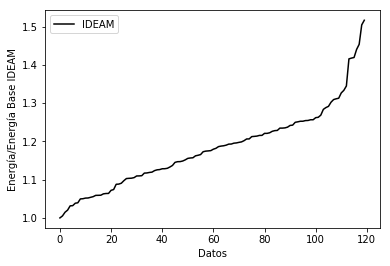

In [6]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatos = range(len(datos_IDEAM))
pylab.plot(numdatos,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.legend(loc='upper left')
pylab.savefig(os.path.join(output_dir,'valledupar_IDEAM.png'), dpi=600)

Finalmente, se calcula el percentil correspondiente al valor de la ENFICC que se desea calcular

In [7]:
percentil = 0.01
enficc = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
print('La ENFICC 99% es: ', enficc)

La ENFICC 99% es:  4.56900737661


In [8]:
list(ghi_mensual_loc)

['AÑO', 'MES', 'DIAS', 'GHImes']

Funciones para realizar el mcp

In [9]:
def prom_desv(serie):
    return np.mean(serie), np.std(serie)


In [10]:
def mcp(seCorta, seLarga):
    mu_y, desv_y=prom_desv(seCorta)
    mu_x, desv_x=prom_desv(seLarga)
    y=(mu_y-(desv_y/desv_x)*mu_x)+(desv_y/desv_x)*seLarga
    return y

In [41]:
ciuda = 'Valledupar'
fuent = 'NREL'
serie_csvN = os.path.join(base_dir,ciuda,fuent+'.csv')
serie_NREL = pd.read_csv(serie_csvN, sep = ';',encoding='latin-1')

In [42]:
corta=serie_pd['IDEAM']
corta[:2000]
y=mcp(corta[:3000],serie_NREL['NREL'])

In [26]:
serie_pd

,AÑO,MES,DIA,HORA,IDEAM
0,2006,1,1,0,0.000000
1,2006,1,1,1,0.000000
2,2006,1,1,2,0.000000
3,2006,1,1,3,0.000000
4,2006,1,1,4,0.000000
5,2006,1,1,5,0.000000
6,2006,1,1,6,0.000000
7,2006,1,1,7,41.559251
8,2006,1,1,8,238.699288
9,2006,1,1,9,455.020517


In [14]:
prom_desv(serie_pd['IDEAM'])

(223.40142124326894, 307.69819180855694)

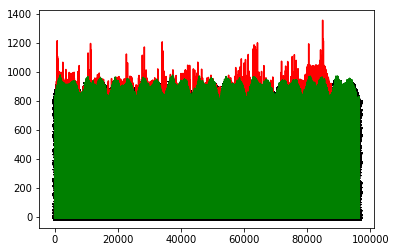

In [23]:
t=np.linspace(0,96408,96408)
f=np.linspace(0,87648,87648)
plt.plot(t, serie_NREL['NREL'], '*k')

plt.plot(f,serie_pd['IDEAM'],'-r')
plt.plot(t,y,'-g')

In [43]:
ghi_mensual_nrelV = ghi_mensual(serie_NREL)
ghi_diario_nrelV = ghi_dia(ghi_mensual_nrelV)
datos_nrelV = sorted(ghi_diario_nrelV["GHIdiario"])

serie_nueva=serie_NREL
serie_nueva['NREL']=y
ghi_mensual_nrel = ghi_mensual(serie_nueva)
ghi_diario_nrel = ghi_dia(ghi_mensual_nrel)
datos_nrel = sorted(ghi_diario_nrel["GHIdiario"])




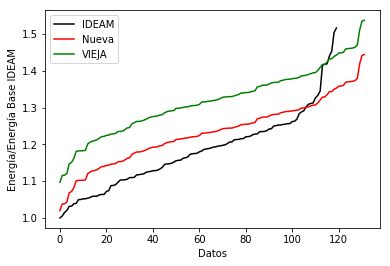

In [44]:
pylab.xlabel("Datos")
pylab.ylabel("Energía/Energía Base IDEAM")
numdatosIDEAM = range(len(datos_IDEAM))
numdatosNUEVA = range(len(datos_nrel))
numdatosVIEJA = range(len(datos_nrelV))

pylab.plot(numdatosIDEAM,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
pylab.plot(numdatosNUEVA,datos_nrel/datos_IDEAM[0],'-r', label='Nueva')
pylab.plot(numdatosVIEJA,datos_nrelV/datos_IDEAM[0],'-g', label='VIEJA')

pylab.legend(loc='upper left')

In [33]:
serie_NREL

,AÑO,MES,DIA,HORA,NREL
0,2005,1,1,0,0.0
1,2005,1,1,1,0.0
2,2005,1,1,2,0.0
3,2005,1,1,3,0.0
4,2005,1,1,4,0.0
5,2005,1,1,5,0.0
6,2005,1,1,6,14.0
7,2005,1,1,7,179.5
8,2005,1,1,8,407.0
9,2005,1,1,9,612.5


In [31]:
serie_nueva

,AÑO,MES,DIA,HORA,NREL
0,2005,1,1,0,-5.038723
1,2005,1,1,1,-5.038723
2,2005,1,1,2,-5.038723
3,2005,1,1,3,-5.038723
4,2005,1,1,4,-5.038723
5,2005,1,1,5,-5.038723
6,2005,1,1,6,8.281860
7,2005,1,1,7,165.750177
8,2005,1,1,8,382.209647
9,2005,1,1,9,577.736773
